In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("D:/AI/heart.csv")

In [3]:
(df.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,diease
0,63.0,M,3.0,145.0,233.0,1.0,Normal,150.0,N,2.3,0.0,0
1,37.0,F,2.0,130.0,250.0,0.0,Normal,187.0,N,3.5,0.0,1
2,41.0,M,1.0,130.0,204.0,0.0,ST,172.0,N,1.4,2.0,0
3,56.0,F,1.0,120.0,236.0,0.0,Normal,178.0,Y,0.8,2.0,1
4,57.0,M,0.0,120.0,354.0,0.0,Normal,163.0,N,0.6,2.0,0
5,57.0,M,0.0,140.0,192.0,0.0,Normal,148.0,N,0.4,1.0,0
6,56.0,F,1.0,140.0,294.0,0.0,Normal,153.0,N,1.3,1.0,0
7,44.0,M,1.0,120.0,263.0,0.0,Normal,173.0,N,0.0,2.0,0
8,52.0,M,2.0,172.0,199.0,1.0,Normal,162.0,Y,0.5,2.0,1
9,57.0,F,2.0,150.0,168.0,0.0,Normal,174.0,N,1.6,2.0,0


In [4]:
df.isnull().any()

age          True
sex         False
cp           True
trestbps     True
chol         True
fbs          True
restecg     False
maxhr        True
exang       False
oldpeak      True
slope        True
diease      False
dtype: bool

In [5]:
df['sex'].value_counts()

M    725
F    193
Name: sex, dtype: int64

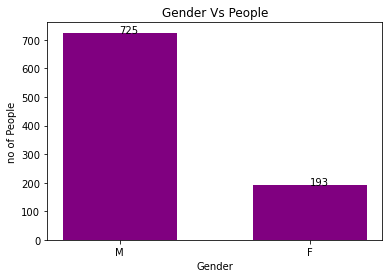

In [6]:
plt.bar(dict(df['sex'].value_counts()).keys(),
        dict(df['sex'].value_counts()).values(), color ='purple',width=0.6)
 
plt.xlabel("Gender")
plt.ylabel("no of People")
plt.title("Gender Vs People")
for index, value in enumerate(df['sex'].value_counts()):
    plt.text(index, value, str(value))
plt.show()

In [7]:
df['diease'].value_counts()

1    508
0    410
Name: diease, dtype: int64

In [8]:
x=pd.DataFrame(df.groupby(["diease","sex"]).size())

In [9]:
print(x)

              0
diease sex     
0      F    143
       M    267
1      F     50
       M    458


Male Gender has more Heart Disease Patients

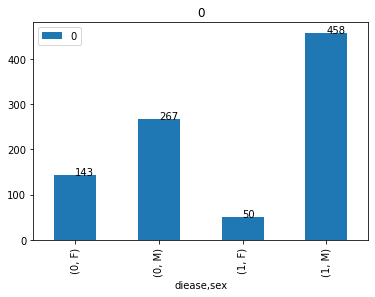

In [10]:
x.plot.bar(subplots=True)
for index, value in enumerate(x[0]):
    plt.text(index, value, str(value))

In [11]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y=df['age'].value_counts(bins=bins, sort=False) 

In [12]:
print(y)

(-0.001, 10.0]      0
(10.0, 20.0]        0
(20.0, 30.0]        1
(30.0, 40.0]       18
(40.0, 50.0]       76
(50.0, 60.0]      129
(60.0, 70.0]       73
(70.0, 80.0]        6
(80.0, 90.0]        0
(90.0, 100.0]       0
Name: age, dtype: int64


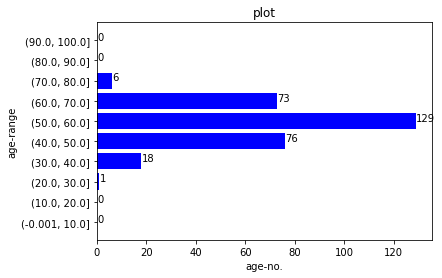

In [13]:
plt.barh(y.keys().astype('string'),dict(y).values(), color ='blue')
 
plt.xlabel("age-no.")
plt.ylabel("age-range")
plt.title("plot")
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

In [14]:
x=pd.DataFrame(df.groupby(["diease",'sex','age']).size())
print(x)

                 0
diease sex age    
0      F   35.0  1
           38.0  2
           40.0  1
           41.0  1
           42.0  1
...             ..
1      M   67.0  5
           68.0  2
           69.0  2
           70.0  1
           77.0  1

[111 rows x 1 columns]


<AxesSubplot:xlabel='diease,sex,age'>

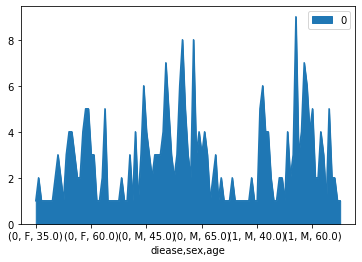

In [15]:
x.plot.area()

Male Gender has more Heart Disease Patients(alawys the dominating age is 30-60)

In [16]:
q=pd.pivot_table(x,values=0,columns='diease',index=['sex','age'],aggfunc=np.sum,)

<AxesSubplot:xlabel='sex,age'>

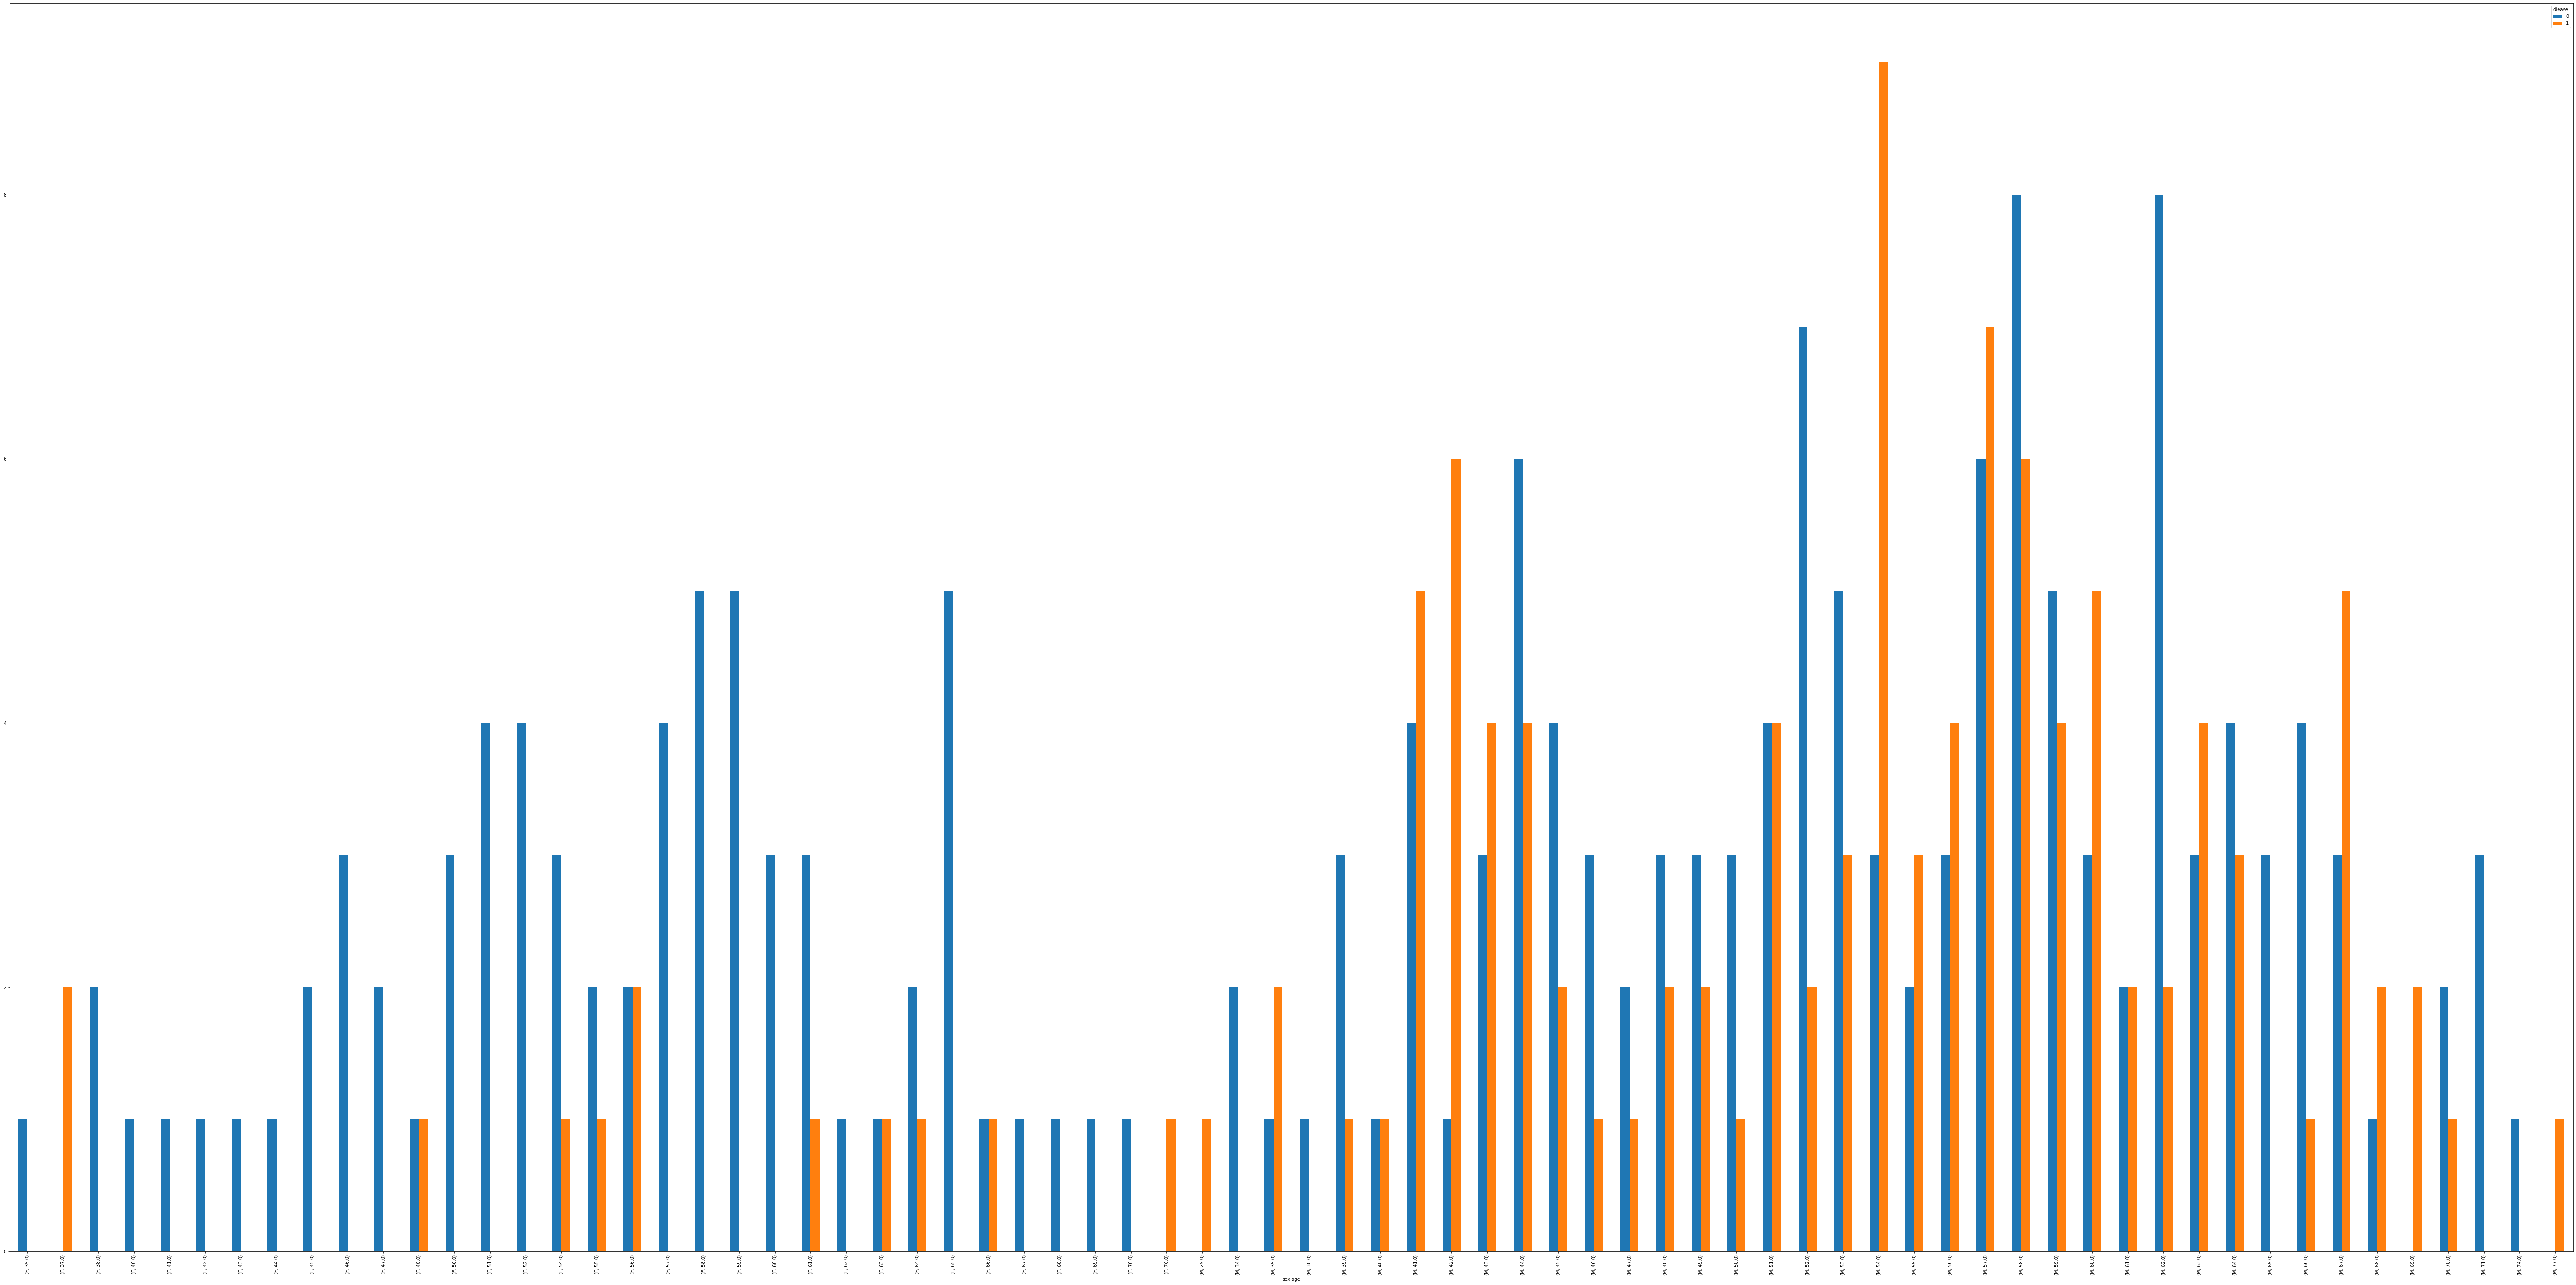

In [17]:
q.plot.bar(figsize=(100,50))


In [18]:
dfc=df.corr()

In [19]:
dfc.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,cp,trestbps,chol,fbs,maxhr,oldpeak,slope,diease
age,1.00,-0.07,0.28,0.21,0.12,-0.40,0.21,-0.17,-0.02
cp,-0.07,1.00,0.05,-0.08,0.09,0.30,-0.15,0.12,-0.07
trestbps,0.28,0.05,1.00,0.12,0.18,-0.05,0.19,-0.12,-0.07
chol,0.21,-0.08,0.12,1.00,0.01,-0.01,0.05,-0.00,0.06
fbs,0.12,0.09,0.18,0.01,1.00,-0.01,0.01,-0.06,-0.08
maxhr,-0.40,0.30,-0.05,-0.01,-0.01,1.00,-0.34,0.39,-0.04
oldpeak,0.21,-0.15,0.19,0.05,0.01,-0.34,1.00,-0.58,-0.03
slope,-0.17,0.12,-0.12,-0.00,-0.06,0.39,-0.58,1.00,-0.08
diease,-0.02,-0.07,-0.07,0.06,-0.08,-0.04,-0.03,-0.08,1.00


In [20]:
cols=['sex','cp','restecg','exang','slope']

In [21]:
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [22]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,diease
0,63.0,1,3,145.0,233.0,1.0,1,150.0,0,2.3,0,0
1,37.0,0,2,130.0,250.0,0.0,1,187.0,0,3.5,0,1
2,41.0,1,1,130.0,204.0,0.0,2,172.0,0,1.4,2,0
3,56.0,0,1,120.0,236.0,0.0,1,178.0,1,0.8,2,1
4,57.0,1,0,120.0,354.0,0.0,1,163.0,0,0.6,2,0
5,57.0,1,0,140.0,192.0,0.0,1,148.0,0,0.4,1,0
6,56.0,0,1,140.0,294.0,0.0,1,153.0,0,1.3,1,0
7,44.0,1,1,120.0,263.0,0.0,1,173.0,0,0.0,2,0
8,52.0,1,2,172.0,199.0,1.0,1,162.0,1,0.5,2,1
9,57.0,0,2,150.0,168.0,0.0,1,174.0,0,1.6,2,0


In [23]:
change=pd.DataFrame(df.groupby(["diease","sex","fbs"]).size())

In [24]:
print(change)

                  0
diease sex fbs     
0      0   0.0   55
           1.0   13
       1   0.0  101
           1.0   19
1      0   0.0   12
       1   0.0   90
           1.0   13


In [25]:
change=pd.pivot_table(change,values=0,columns='diease',index=['sex','fbs'],aggfunc=np.sum,)

<AxesSubplot:xlabel='sex,fbs'>

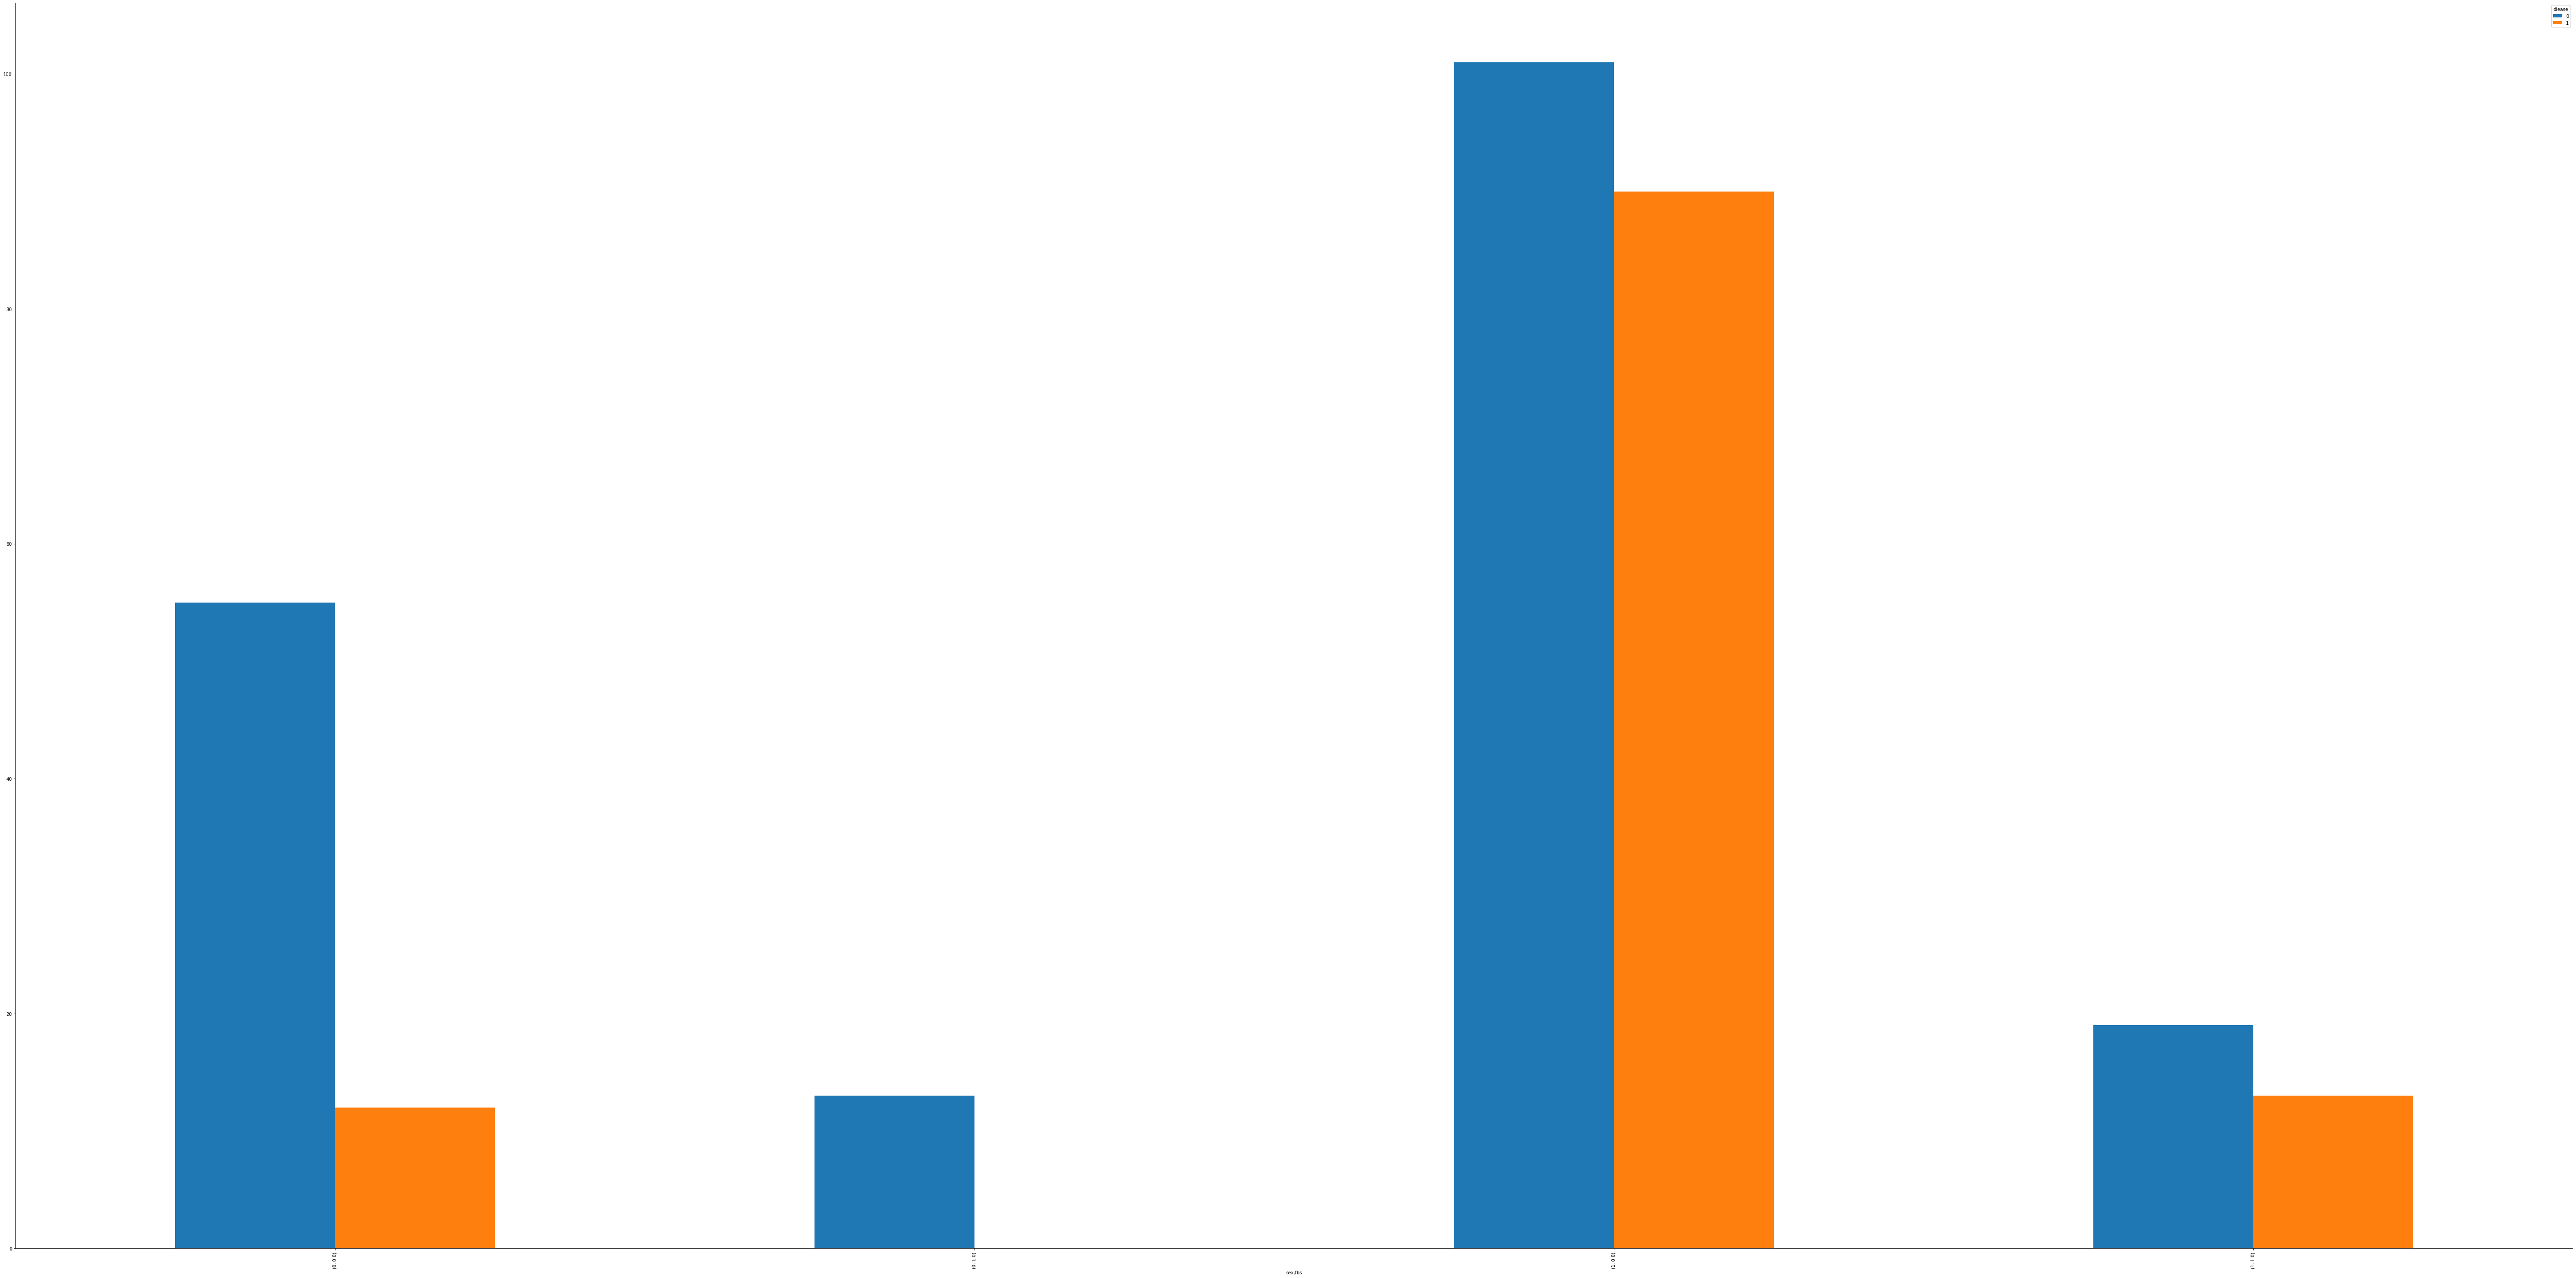

In [26]:
change.plot.bar(figsize=(100,50))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmc, k=(1,12)).fit(data)
visualizer.show()

In [ ]:
kmc = KMeans()


In [ ]:
kmc = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df)
df.head(3)

In [ ]:
sns.scatterplot(data=data, x="Cholesterol", y="Age", hue=kmc.labels_)
plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids") 
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering,linkage_tree
agc=AgglomerativeClustering(n_clusters=3).fit(data)
litree=linkage_tree(data)
sns.scatterplot(data=data, x="Cholesterol", y="Age", hue=agc.labels_)
plt.legend()
plt.show()

In [ ]:
sns.scatterplot(data=data, x="Cholesterol", y="HeartDisease", hue=agc.labels_)
plt.legend()
plt.show()

sns.scatterplot(data=data, x="Cholesterol", y="Sex", hue=agc.labels_)
plt.legend()
plt.show()